In [1]:
# imports
import h2o 
import numpy as np
import pandas as pd
from h2o.estimators.gbm import H2OGradientBoostingEstimator 
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch

In [2]:
# display matplotlib graphics in notebook
%matplotlib inline

In [3]:
# start and connect to h2o server
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_112"; Java(TM) SE Runtime Environment (build 1.8.0_112-b16); Java HotSpot(TM) 64-Bit Server VM (build 25.112-b16, mixed mode)
  Starting server from /Users/phall/anaconda/lib/python3.5/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/tc/0ss1l73113j3wdyjsxmy1j2r0000gn/T/tmp3eolwjz6
  JVM stdout: /var/folders/tc/0ss1l73113j3wdyjsxmy1j2r0000gn/T/tmp3eolwjz6/h2o_phall_started_from_python.out
  JVM stderr: /var/folders/tc/0ss1l73113j3wdyjsxmy1j2r0000gn/T/tmp3eolwjz6/h2o_phall_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster version:,3.10.3.4
H2O cluster version age:,1 month and 2 days
H2O cluster name:,H2O_from_python_phall_e5qkx0
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


In [4]:
# location of "dirty" file
# decision trees handle dirty data elegantly
path = '/Users/phall/workspace/h2o-meetups/2017_03_07_DC_Intro/data/loan.csv'

In [5]:
# define input variable measurement levels 
# strings automatically parsed as enums (nominal)
# numbers automatically parsed as numeric
col_types = {'bad_loan': 'enum'}

In [6]:
frame = h2o.import_file(path=path, col_types=col_types) # multi-threaded import

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [7]:
frame.describe()

Rows:163987
Cols:16




,id,bad_loan,loan_amnt,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,longest_credit_length,verification_status,term_length
type,int,enum,int,real,int,enum,real,enum,enum,real,int,real,int,int,enum,int
mins,10001.0,,500.0,5.42,0.0,,1896.0,,,0.0,0.0,0.0,1.0,0.0,,36.0
mean,91994.0,,13073.209220415742,13.717143207254315,5.686200649105202,,71931.19588595249,,,15.880794152061497,0.22746713629788037,54.07622244747627,24.577910646698616,14.8582097058084,,40.980679245283056
maxs,173987.0,,35000.0,26.060000000000002,10.0,,7141778.0,,,39.93,29.0,150.70000000000002,118.0,65.0,,60.0
sigma,47339.11363414683,,7992.3993793601785,4.3935679462170425,3.610039811481059,,59464.026648950334,,,7.583636421364416,0.6949139713078192,25.284135504932134,11.685003948632696,6.949793041523766,,9.732920010298912
zeros,0,,0,0,13810,,0,,,263,135210,1515,0,11,,0
missing,0,0,4992,4854,10545,2571,4983,2488,2484,5025,4997,5154,4933,4907,2426,4987
0,10001.0,0,5000.0,10.65,10.0,RENT,24000.0,credit_card,AZ,27.650000000000002,0.0,83.7,9.0,26.0,verified,36.0
1,10002.0,1,2500.0,15.27,0.0,RENT,30000.0,car,GA,1.0,0.0,9.4,4.0,12.0,verified,60.0
2,10003.0,0,2400.0,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,10.0,not verified,36.0


In [8]:
# correct MORTGAGE/mortgage problem using gsub() and trim() functions
print(frame['home_ownership'].table())

frame['home_ownership'] = frame['home_ownership'].gsub(pattern='mortgage',
                                                       replacement='MORTGAGE')
frame['home_ownership'] = frame['home_ownership'].trim()

print(frame['home_ownership'].table())

home_ownership,Count
ANY,1
MORTGAGE,74209
NONE,30
OTHER,151
OWN,13369
RENT,69416
mortgage,4240


home_ownership,Count
ANY,1
MORTGAGE,78449
NONE,30
OTHER,151
OWN,13369
RENT,69416


In [9]:
# split into 40% training, 30% validation, and 30% test
train, valid, test = frame.split_frame([0.4, 0.3])

In [10]:
# assign target and inputs
y = 'bad_loan'
X = [name for name in frame.columns if name not in ['id', '_WARN_', y]]
print(y)
print(X)

bad_loan
['loan_amnt', 'int_rate', 'emp_length', 'home_ownership', 'annual_inc', 'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'revol_util', 'total_acc', 'longest_credit_length', 'verification_status', 'term_length']


In [11]:
# set target to factor - for binary classification
train[y] = train[y].asfactor()
valid[y] = valid[y].asfactor()
test[y] = test[y].asfactor()

In [12]:
# random forest

# initialize rf model
rf_model = H2ORandomForestEstimator(
    ntrees=500,                      # Up to 500 decision trees in the forest 
    max_depth=30,                    # trees can grow to depth of 30
    stopping_rounds=5,               # stop after validation error does not decrease for 5 iterations/new trees
    score_each_iteration=True,       # score validation error on every iteration/new tree
    model_id='rf_model')             # for easy lookup in flow

# train rf model
rf_model.train(
    x=X,
    y=y,
    training_frame=train,
    validation_frame=valid)

# print model information
rf_model

# view detailed results at http://localhost:54321/flow/index.html

drf Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf_model


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.15075128726317816
RMSE: 0.38826703087331293
LogLoss: 0.5353924091011258
Mean Per-Class Error: 0.38940574902878844
AUC: 0.6517819084639158
Gini: 0.30356381692783163
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.20828911347902893: 


,0,1,Error,Rate
0,32991.0,19698.0,0.3739,(19698.0/52689.0)
1,5130.0,7538.0,0.405,(5130.0/12668.0)
Total,38121.0,27236.0,0.3799,(24828.0/65357.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2082891,0.3778067,244.0
max f2,0.0740546,0.5544498,351.0
max f0point5,0.3090936,0.3346726,171.0
max accuracy,0.6861278,0.8064018,18.0
max precision,0.9166667,1.0,0.0
max recall,0.0000027,1.0,399.0
max specificity,0.9166667,1.0,0.0
max absolute_mcc,0.2560088,0.1818208,208.0
max min_per_class_accuracy,0.2014656,0.6094441,249.0
max mean_per_class_accuracy,0.2082891,0.6105943,244.0


Gains/Lift Table: Avg response rate: 19.38 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0111694,0.8255814,5.1592201,5.1592201,1.0,1.0,0.0576255,0.0576255,415.9220082,415.9220082
,2,0.0215891,0.8023256,5.1592201,5.1592201,1.0,1.0,0.0537575,0.1113830,415.9220082,415.9220082
,3,0.0300044,0.7861727,5.1592201,5.1592201,1.0,1.0,0.0434165,0.1547995,415.9220082,415.9220082
,4,0.0400416,0.7720930,5.1592201,5.1592201,1.0,1.0,0.0517840,0.2065835,415.9220082,415.9220082
,5,0.0502624,0.7616279,5.1592201,5.1592201,1.0,1.0,0.0527313,0.2593148,415.9220082,415.9220082
,6,0.1000199,0.7107558,5.1592201,5.1592201,1.0,1.0,0.2567098,0.5160246,415.9220082,415.9220082
,7,0.1500069,0.6611296,5.1592201,5.1592201,1.0,1.0,0.2578939,0.7739185,415.9220082,415.9220082
,8,0.2002846,0.2209302,4.4966544,4.9928953,0.8715764,0.9677617,0.2260815,1.0,349.6654387,399.2895340
,9,0.3079854,0.1279070,0.0,3.2469074,0.0,0.6293408,0.0,1.0,-100.0,224.6907447
,10,0.4001102,0.0996678,0.0,2.4993117,0.0,0.4844359,0.0,1.0,-100.0,149.9311663




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.14636244588528968
RMSE: 0.38257345162110984
LogLoss: 0.46429223112667245
Mean Per-Class Error: 0.3737992733268749
AUC: 0.6715959055324566
Gini: 0.34319181106491325
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2140973336235321: 


,0,1,Error,Rate
0,25849.0,14042.0,0.352,(14042.0/39891.0)
1,3749.0,5728.0,0.3956,(3749.0/9477.0)
Total,29598.0,19770.0,0.3604,(17791.0/49368.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2140973,0.3916983,223.0
max f2,0.1124721,0.5610019,320.0
max f0point5,0.2981213,0.3483918,156.0
max accuracy,0.5506582,0.8086210,30.0
max precision,0.7790698,1.0,0.0
max recall,0.0000603,1.0,399.0
max specificity,0.7790698,1.0,0.0
max absolute_mcc,0.2140973,0.2028758,223.0
max min_per_class_accuracy,0.2093029,0.6247775,228.0
max mean_per_class_accuracy,0.2140973,0.6262007,223.0


Gains/Lift Table: Avg response rate: 19.20 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100065,0.5264826,2.6573469,2.6573469,0.5101215,0.5101215,0.0265907,0.0265907,165.7346852,165.7346852
,2,0.0204991,0.4883721,2.1520813,2.3987228,0.4131274,0.4604743,0.0225810,0.0491717,115.2081263,139.8722766
,3,0.0300194,0.4622895,2.1501984,2.3199060,0.4127660,0.4453441,0.0204706,0.0696423,115.0198353,131.9905982
,4,0.0403500,0.4418605,2.1858394,2.2855817,0.4196078,0.4387550,0.0225810,0.0922233,118.5839401,128.5581706
,5,0.0500527,0.4215116,2.0662970,2.2430737,0.3966597,0.4305949,0.0200485,0.1122718,106.6296977,124.3073659
,6,0.1000041,0.3631547,1.8969589,2.0701915,0.3641525,0.3974073,0.0947557,0.2070275,89.6958881,107.0191536
,7,0.1576527,0.3255814,1.5466657,1.8787545,0.2969079,0.3606578,0.0891632,0.2961908,54.6665741,87.8754505
,8,0.2000081,0.2990565,1.5022352,1.7990197,0.2883788,0.3453514,0.0636277,0.3598185,50.2235193,79.9019658
,9,0.3000122,0.2528278,1.2777788,1.6252727,0.2452907,0.3119978,0.1277831,0.4876016,27.7778772,62.5272696
,10,0.3999959,0.2140168,1.1587823,1.5086678,0.2224473,0.2896136,0.1158594,0.6034610,15.8782271,50.8667807



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_lift,validation_classification_error
,2017-03-05 14:16:53,0.020 sec,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
,2017-03-05 14:16:55,1.299 sec,1.0,0.5391351,9.9203749,0.5397264,3.6849801,0.8068257,0.5374506,9.8522304,0.5386787,1.3135552,0.8080335
,2017-03-05 14:16:56,2.425 sec,2.0,0.5230054,8.8079987,0.5445239,4.9074938,0.8061674,0.4662391,5.0486580,0.5585188,1.5457183,0.8080335
,2017-03-05 14:16:56,3.137 sec,3.0,0.5074266,7.7435991,0.5496076,5.1285578,0.8068161,0.4380383,3.3379267,0.5777664,1.9107533,0.4339856
,2017-03-05 14:16:57,3.893 sec,4.0,0.4952314,6.8928670,0.5530022,5.1497246,0.8069725,0.4246094,2.5540634,0.5889788,1.7144940,0.4874615
---,---,---,---,---,---,---,---,---,---,---,---,---,---
,2017-03-05 14:18:56,2 min 2.801 sec,82.0,0.3886783,0.5430277,0.6502138,5.1592201,0.4035375,0.3826836,0.4646457,0.6709189,2.6468018,0.3873764
,2017-03-05 14:18:59,2 min 5.426 sec,83.0,0.3885974,0.5423880,0.6504316,5.1592201,0.4191594,0.3826640,0.4645681,0.6709915,2.6676368,0.3678091
,2017-03-05 14:19:01,2 min 8.032 sec,84.0,0.3884372,0.5395266,0.6512154,5.1592201,0.4118304,0.3826387,0.4645174,0.6711214,2.6519785,0.3526576
,2017-03-05 14:19:04,2 min 10.659 sec,85.0,0.3883621,0.5370038,0.6515515,5.1592201,0.4239026,0.3826074,0.4644277,0.6713335,2.7223158,0.3552706



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
addr_state,95374.8906250,1.0,0.1747782
int_rate,63751.4960938,0.6684306,0.1168271
dti,51693.3632812,0.5420018,0.0947301
revol_util,50422.0546875,0.5286722,0.0924004
loan_amnt,46254.2929688,0.4849735,0.0847628
total_acc,44232.6523438,0.4637767,0.0810581
longest_credit_length,42547.5117188,0.4461081,0.0779700
annual_inc,41075.2265625,0.4306713,0.0752719
emp_length,34380.6914062,0.3604795,0.0630040
purpose,31926.6015625,0.3347485,0.0585067


In [13]:
# measure rf AUC
print(rf_model.auc(train=True))
print(rf_model.auc(valid=True))
print(rf_model.model_performance(test_data=test).auc())

0.6517819084639158
0.6715959055324566
0.6606926803427772


In [14]:
# GBM with random hyperparameter search
# train many different GBM models with random hyperparameters
# and select best model based on validation error

# define random grid search parameters
hyper_parameters = {'ntrees':list(range(0, 500, 50)),
                    'max_depth':list(range(0, 20, 2)),
                    'sample_rate':[s/float(10) for s in range(1, 11)],
                    'col_sample_rate':[s/float(10) for s in range(1, 11)]}

# define search strategy
search_criteria = {'strategy':'RandomDiscrete',
                   'max_models':20,
                   'max_runtime_secs':600}

# initialize grid search
gsearch = H2OGridSearch(H2OGradientBoostingEstimator,
                        hyper_params=hyper_parameters,
                        search_criteria=search_criteria)

# execute training w/ grid search
gsearch.train(x=X,
              y=y,
              training_frame=train,
              validation_frame=valid)

# view detailed results at http://localhost:54321/flow/index.html

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [15]:
# show grid search results
gsearch.show()

# select best model
gbm_model = gsearch.get_grid()[0]

# print model information
gbm_model

     col_sample_rate max_depth ntrees sample_rate  \
0                0.8         2    250         0.7   
1                0.7         4    100         0.8   
2                0.1         2    150         0.2   
3                1.0         4    150         0.3   
4                0.5         4    350         0.7   
5                0.7         8     50         0.4   
6                0.6         8    450         1.0   
7                0.2         8    350         0.6   
8                1.0        12      0         0.7   
9                0.8        18     50         0.7   
10               0.8        18     50         0.2   
11               0.6        14    100         0.6   
12               0.6        12    150         0.7   
13               0.4        14    250         0.4   
14               0.5        18    150         0.8   
15               0.3        18    250         0.5   
16               1.0        14    350         0.1   
17               1.0        14    450         

,0,1,Error,Rate
0,38328.0,14361.0,0.2726,(14361.0/52689.0)
1,5472.0,7196.0,0.432,(5472.0/12668.0)
Total,43800.0,21557.0,0.3035,(19833.0/65357.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2217406,0.4205113,212.0
max f2,0.1247670,0.5770350,306.0
max f0point5,0.3078023,0.3899552,144.0
max accuracy,0.4673676,0.8092324,54.0
max precision,0.7863220,1.0,0.0
max recall,0.0294272,1.0,397.0
max specificity,0.7863220,1.0,0.0
max absolute_mcc,0.2256728,0.2493185,208.0
max min_per_class_accuracy,0.1961905,0.6484844,236.0
max mean_per_class_accuracy,0.2042452,0.6498290,228.0


Gains/Lift Table: Avg response rate: 19.38 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100066,0.5139420,3.0056007,3.0056007,0.5825688,0.5825688,0.0300758,0.0300758,200.5600690,200.5600690
,2,0.0200132,0.4737233,2.9109361,2.9582684,0.5642202,0.5733945,0.0291285,0.0592043,191.0936101,195.8268396
,3,0.0300044,0.4457849,2.4887509,2.8019222,0.4823890,0.5430903,0.0248658,0.0840701,148.8750882,180.1922176
,4,0.0400110,0.4242693,2.3981696,2.7009454,0.4648318,0.5235182,0.0239975,0.1080676,139.8169579,170.0945427
,5,0.0500023,0.4073440,2.1648182,2.5938184,0.4196018,0.5027540,0.0216293,0.1296969,116.4818227,159.3818419
,6,0.1000046,0.3490916,2.0428491,2.3183337,0.3959608,0.4493574,0.1021471,0.2318440,104.2849078,131.8333749
,7,0.1500069,0.3092111,1.7555241,2.1307305,0.3402693,0.4129947,0.0877802,0.3196243,75.5524092,113.0730530
,8,0.2000092,0.2791614,1.5250326,1.9793061,0.2955936,0.3836444,0.0762551,0.3958794,52.5032619,97.9306052
,9,0.2999985,0.2323303,1.3578973,1.7721909,0.2631982,0.3434998,0.1357752,0.5316546,35.7897252,77.2190914
,10,0.4000031,0.1982739,1.0837835,1.6000825,0.2100673,0.3101404,0.1083833,0.6400379,8.3783533,60.0082486




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.144003086482751
RMSE: 0.3794773859965189
LogLoss: 0.4537991032034487
Mean Per-Class Error: 0.3639027897395839
AUC: 0.6877167328030188
Gini: 0.37543346560603763
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1922280923953544: 


,0,1,Error,Rate
0,25199.0,14692.0,0.3683,(14692.0/39891.0)
1,3407.0,6070.0,0.3595,(3407.0/9477.0)
Total,28606.0,20762.0,0.3666,(18099.0/49368.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1922281,0.4014683,243.0
max f2,0.1220848,0.5700713,312.0
max f0point5,0.2996455,0.3660054,152.0
max accuracy,0.5367316,0.8091476,28.0
max precision,0.7299188,0.6666667,1.0
max recall,0.0266630,1.0,398.0
max specificity,0.7444809,0.9999749,0.0
max absolute_mcc,0.2163111,0.2202926,220.0
max min_per_class_accuracy,0.1933041,0.6353062,242.0
max mean_per_class_accuracy,0.1922281,0.6360972,243.0


Gains/Lift Table: Avg response rate: 19.20 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100065,0.5114971,2.8049772,2.8049772,0.5384615,0.5384615,0.0280680,0.0280680,180.4977232,180.4977232
,2,0.0200130,0.4727224,2.3831761,2.5940767,0.4574899,0.4979757,0.0238472,0.0519152,138.3176145,159.4076689
,3,0.0300194,0.4442961,2.3515411,2.5132315,0.4514170,0.4824561,0.0235307,0.0754458,135.1541063,151.3231480
,4,0.0400057,0.4240771,2.1661154,2.4265843,0.4158215,0.4658228,0.0216313,0.0970771,116.6115423,142.6584282
,5,0.0500122,0.4067934,2.2777259,2.3968005,0.4372470,0.4601053,0.0227920,0.1198692,127.7725873,139.6800542
,6,0.1000041,0.3478987,1.9376359,2.1672647,0.3719611,0.4160421,0.0968661,0.2167353,93.7635928,116.7264737
,7,0.1500162,0.3083461,1.6963271,2.0102643,0.3256379,0.3859033,0.0848370,0.3015722,69.6327144,101.0264343
,8,0.2000081,0.2785236,1.4796109,1.8776278,0.2840357,0.3604416,0.0739686,0.3755408,47.9610877,87.7627848
,9,0.3000122,0.2327497,1.3041574,1.6864710,0.2503545,0.3237459,0.1304210,0.5059618,30.4157359,68.6471018
,10,0.3999959,0.1978352,1.1112912,1.5426979,0.2133306,0.2961463,0.1111111,0.6170729,11.1291194,54.2697908



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_lift,validation_classification_error
,2017-03-05 14:20:23,1 min 10.157 sec,0.0,0.3952955,0.4917259,0.5,1.0,0.8061723,0.3938512,0.4890729,0.5,1.0,0.8080335
,2017-03-05 14:20:23,1 min 10.189 sec,1.0,0.3937361,0.4878245,0.6333557,1.7638106,0.4190217,0.3922559,0.4850972,0.6357646,1.8016112,0.4169705
,2017-03-05 14:20:23,1 min 10.228 sec,2.0,0.3923032,0.4842922,0.6537711,2.0022146,0.4190217,0.3908437,0.4816277,0.6538537,2.0118457,0.4052625
,2017-03-05 14:20:23,1 min 10.276 sec,3.0,0.3910934,0.4813377,0.6588689,2.2652878,0.4147834,0.3895994,0.4785995,0.6601204,2.3609461,0.4052625
,2017-03-05 14:20:24,1 min 10.329 sec,4.0,0.3901187,0.4790035,0.6656632,2.3611349,0.4518414,0.3886631,0.4763617,0.6653652,2.5114037,0.3584711
---,---,---,---,---,---,---,---,---,---,---,---,---,---
,2017-03-05 14:20:26,1 min 13.017 sec,22.0,0.3834179,0.4628557,0.6793998,2.5718401,0.3674587,0.3823448,0.4610010,0.6770020,2.7817360,0.3764584
,2017-03-05 14:20:27,1 min 13.323 sec,23.0,0.3832717,0.4624541,0.6795841,2.5404062,0.3744205,0.3822140,0.4606246,0.6770973,2.7559925,0.3698347
,2017-03-05 14:20:27,1 min 13.628 sec,24.0,0.3831320,0.4621534,0.6803802,2.5364202,0.3517756,0.3820959,0.4603656,0.6777927,2.7733422,0.3715565
,2017-03-05 14:20:27,1 min 13.936 sec,25.0,0.3830012,0.4618717,0.6807836,2.5874270,0.3609713,0.3820053,0.4601654,0.6779062,2.7522521,0.3701386



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
int_rate,2050.5585938,1.0,0.4740285
addr_state,560.4555664,0.2733185,0.1295608
annual_inc,475.9758606,0.2321201,0.1100316
term_length,441.4547729,0.2152851,0.1020513
dti,253.3664551,0.1235597,0.0585708
purpose,136.6278381,0.0666296,0.0315843
loan_amnt,126.4558563,0.0616690,0.0292329
revol_util,117.3670349,0.0572366,0.0271318
total_acc,68.4763031,0.0333940,0.0158297
home_ownership,41.4720535,0.0202248,0.0095871


In [16]:
# measure gbm AUC
print(gbm_model.auc(train=True))
print(gbm_model.auc(valid=True))
print(gbm_model.model_performance(test_data=test).auc())

0.7051474331242537
0.6877167328030188
0.6833090311292126


PartialDependencePlot progress: |█████████████████████████████████████████| 100%


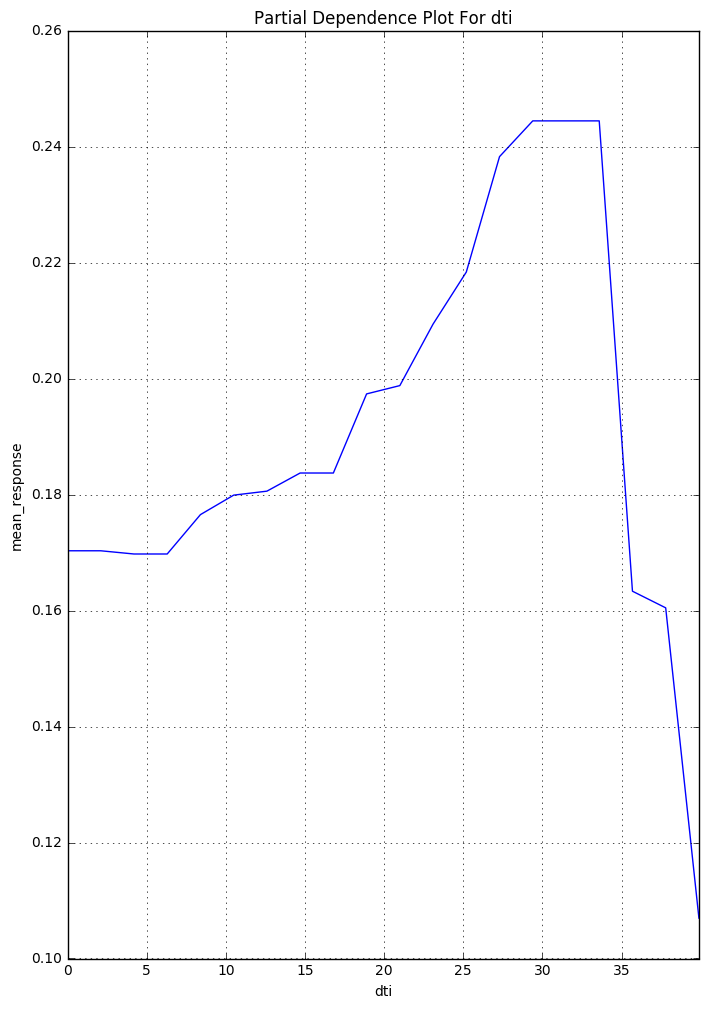

In [17]:
# partial dependence plots are a powerful machine learning interpretation tool
# to calculate partial dependence across the domain a variable
# hold column of interest at constant value
# find the mean prediction of the model with this column constant
# repeat for multiple values of the variable of interest
# h2o has a built-in function for partial dependence as well
par_dep_dti1 = gbm_model.partial_plot(data=train, cols=['dti'], server=True, plot=True)

In [18]:
# shutdown h2o
h2o.cluster().shutdown(prompt=False)

H2O session _sid_a671 closed.
